## Challenge

Many customers decide to trade-in their current vehicle when purchasing a vehicle at CarMax.
What does a customer's appraised vehicle tell us about the vehicle they will end up purchasing?
How can CarMax use this information to improve business operations and provide customers a personalized shopping experience?

In [234]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
from scipy.stats import chisquare, chi2, chi2_contingency, f_oneway, spearmanr, kruskal
from dython.nominal import associations

In [404]:
# data
customer_df = pd.read_csv('../Data/processed_data.csv')

## Is there a difference in the distribution of price of cars purchased for online and offline appraisals?

In [343]:
online_appraisal = customer_df[customer_df['online_appraisal_flag']==1]
offline_appraisal = customer_df[customer_df['online_appraisal_flag']==0]

In [344]:
expected_probability = offline_appraisal['price'].value_counts()/len(offline_appraisal)

In [345]:
expected_probability = round(expected_probability.reindex(natsorted(expected_probability.index)),4)

In [346]:
observed_count = online_appraisal['price'].value_counts()

In [347]:
observed_count = observed_count.reindex(natsorted(observed_count.index))

In [348]:
expected_count = round(expected_probability * sum(observed_count))

In [349]:
chisquare(f_obs = observed_count, f_exp = expected_count)

Power_divergenceResult(statistic=404.31698369455717, pvalue=4.610865287815151e-79)

In [320]:
round(chi2.ppf(0.95, 12),2)

21.03

Since p << 0.05 and $\chi^{2} $ statistic is greater than 21.03, we can say that there is no difference in the distribution of price of purchased cars between online and offline appraisal

## Association between categorical variables

In [401]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2,p_val = chi2_contingency(confusion_matrix)[:2]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))), p_val

In [380]:
cat_appraisal_cols = ['appraisal_offer','mileage_appraisal','make_appraisal','model_appraisal',
                      'trim_descrip_appraisal','body_appraisal','color_appraisal',
                      'mpg_city_appraisal','mpg_highway_appraisal','fuel_capacity_appraisal',
                      'engine_appraisal','cylinders_appraisal','model_year_appraisal',
                      'market', 'online_appraisal_flag']

In [369]:
cat_purchase_cols = ['price','mileage','make','model','trim_descrip','body','color',
                     'cylinders','mpg_city','mpg_highway','engine','fuel_capacity','model_year']

In [394]:
def cramerV_heatmap(df, X_cols, Y_cols):
    outr_lst = []
    for col1 in Y_cols:
        innr_lst = []
        for col2 in X_cols:
            assc, p_val = cramers_v(df[col1], df[col2])
            if p_val<0.05:
                innr_lst.append(round(assc,3))
            else:
                innr_lst.append(0)
        outr_lst.append(innr_lst)
    
    categorical_association_cramerv = pd.DataFrame(outr_lst, index=Y_cols, columns=X_cols)
    
    fig, ax = plt.subplots(figsize=(11,11)) 
    sns.heatmap(categorical_association_cramerv, annot=True, cmap='YlGnBu', 
                linewidth=0.05, linecolor='k', ax =ax)
    plt.savefig('../plots/cramersV_heatmap.png', bbox_inches = 'tight');
    return None

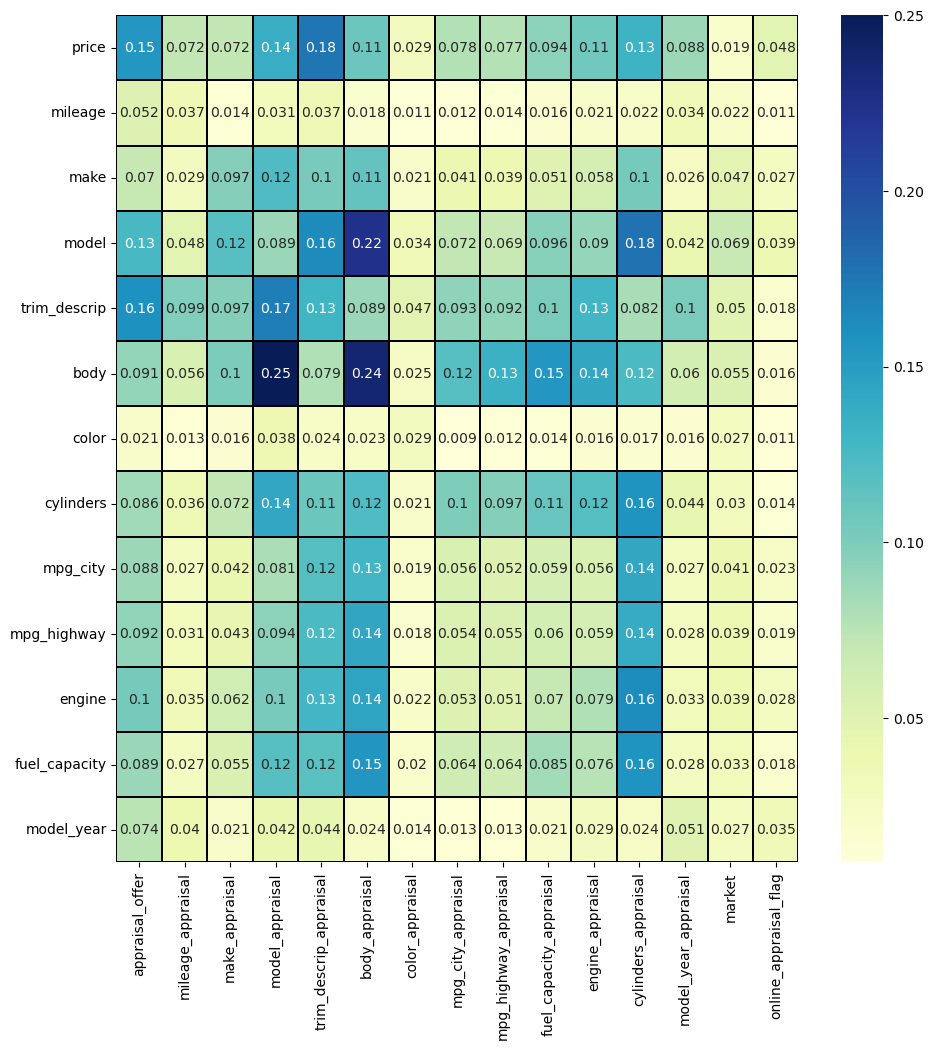

In [403]:
cramerV_heatmap(customer_df, cat_appraisal_cols, cat_purchase_cols)